In [1]:
import opengrid as og
from opengrid import datasets

In [1]:
%matplotlib inline

In [4]:
df = datasets.get('gas_2016_hour')

### We want to create a monthly model for one of the gas counters. 

Please note that the data does not contain any weater variable, only two other gas counters.

In [12]:
df_month = df.resample('MS').sum().loc['2016']/1000 # kWh/month
mvlr = og.MultiVarLinReg(df_month, endog='313b')

/home/roel/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
/home/roel/work/opengrid/code/og/opengrid/library/regression.py:397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dfmodel.sort_index(inplace=True)


                            OLS Regression Results                            
Dep. Variable:              Q('313b')   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     17.26
Date:                Sun, 10 Dec 2017   Prob (F-statistic):            0.00197
Time:                        21:46:40   Log-Likelihood:                -95.066
No. Observations:                  12   AIC:                             194.1
Df Residuals:                      10   BIC:                             195.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    462.9106    306.924      1.508      0.1

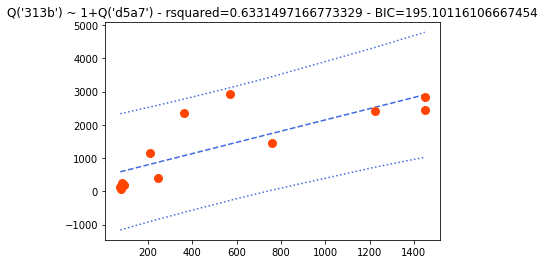

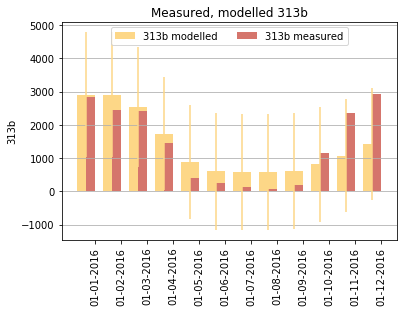

In [13]:
print(mvlr.fit.summary())
mvlr.plot()